# 1. Trichromacy 


<img src="https://www.researchgate.net/profile/Geert-Verhoeven-2/publication/306264840/figure/fig5/AS:614364306497538@1523487273429/The-setup-of-a-colour-matching-experiment.png" width="100%" style="margin-left:auto; margin-right:auto">  

Load the file colMatch.mat in my Python.  The function returns a 3-vector containing the observer's knob settings" the intensities of each of the primaries that, when mixed together, appear identical to the test light. 

In [38]:
import scipy.io as spio
from trichromacy import human_color_matcher
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import seaborn as sn
import pandas as pd
import numpy.matlib
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
ColMatch=spio.loadmat('/Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Python/DataScience/Final_project/colMatch.mat')
ColMatch.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Cones', 'P', 'eP', 'wl'])

This file contains matrices and vectors related to the color
matching experiment presented. In particular, the variable P is an N $\times$ 3 matrix containing wavelength spectra for three "primary" lights, that could be used in a colormatching experiment. For these problems N = 31, corresponding to samples of the visible wavelength spectrum from 400nm to 700nm in increments of 10nm.
The function humanColorMatcher.p simulates a normal human observer in a color matching
experiment. 

In [7]:
print(ColMatch['P'])

[[0.385171 0.070337 0.067121]
 [0.471853 0.072987 0.063994]
 [0.493316 0.067948 0.060949]
 [0.497136 0.063878 0.066082]
 [0.488206 0.068092 0.069151]
 [0.476158 0.068396 0.0786  ]
 [0.463775 0.071183 0.08961 ]
 [0.445076 0.081728 0.111547]
 [0.421097 0.095957 0.143665]
 [0.396976 0.113168 0.193252]
 [0.374379 0.132417 0.277898]
 [0.343796 0.158213 0.397022]
 [0.295302 0.207884 0.499834]
 [0.25081  0.292901 0.552137]
 [0.229799 0.393461 0.567022]
 [0.227681 0.475133 0.558777]
 [0.22     0.532027 0.539366]
 [0.214699 0.577602 0.51655 ]
 [0.228228 0.613082 0.483869]
 [0.247012 0.63851  0.44171 ]
 [0.25985  0.656375 0.395269]
 [0.269687 0.671135 0.362422]
 [0.266512 0.681734 0.348063]
 [0.267986 0.693257 0.342001]
 [0.284767 0.704632 0.338504]
 [0.328625 0.711578 0.334981]
 [0.391731 0.720305 0.344302]
 [0.455403 0.728265 0.36425 ]
 [0.49943  0.73434  0.386038]
 [0.523844 0.737723 0.404147]
 [0.534261 0.745306 0.418349]]


## Question A
Create a test light with an arbitrary wavelength spectrum, by generating a random
column vector with 31 positive components. Use humanColorMatcher to "run an experiment", asking the "human" to set the intensities of the three primaries in P to match the appearance of the test light.
Compute the 31-dimensional wavelength spectrum of this combination of primaries, plot
it together with the original light spectrum, and explain why the two spectra are so
different, even though they appear the same to the human.

Knob setting [[ 0.91956029]
 [-0.34980398]
 [ 0.88134166]]


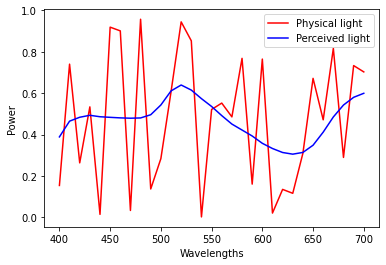

In [17]:
np.random.seed(12)
# a random light
test_light=np.random.rand(31,1)
# primaries 
primaries=ColMatch['P']
# wavelength spectrum at each point
wavelengths=np.arange(400,701,step=10).reshape(-1,1)
#%% Experiment
# Run an experiment and get knob settings 
knobs=human_color_matcher(test_light,primaries)
print('Knob setting',knobs)
# derive the combined light that the observer perceived 
perceived_light=primaries@knobs
#%% Visualize
# visualize perceived light and physical light (test_light) 
plt.figure()
test=plt.plot(wavelengths,test_light,'r-',label='Physical light')
p=plt.plot(wavelengths,perceived_light,'b-',label='Perceived light')
plt.xlabel('Wavelengths')
plt.ylabel('Power')
plt.legend()

They look different but these two lights will generate the same color for human because three cones will have the same responses. 

# Question B
Your colleague down the hall, Dr. Evoprimary, proudly tells you about a new colormatching
configuration using primaries derived from pigments that were most prevalent
in the environment of our evolutionary ancestors. You respond that this is a beautiful
concept, but seems unlikely to offer new insights into human trichromacy, since you can
precisely predict the color matches that will be obtained with these new primaries. Dr.
E allows you to measure the wavelength spectra of the new primaries (stored in variable
eP). Derive (write math, and explain logic) an expression for the color-matching matrix
(3x31, maps a light to 3 knob settings) that predicts matches that would be obtained in
Dr E's lab. Compute this matrix, making use of humanColorMatcher.p with your own
primaries, P. Check, for a random test light, that the predicted mixture of eP primaries
matches (produces the same knob settings when tested with your primaries, P). If it does
not, explain why.

## Mathmatical expression for the color matching matrix
Suppose $\boldsymbol{H_e}$ is the color matching matrix (that maps a light to 3 knob settings), $\boldsymbol{P_e}$ is the primary in Dr. E's lab. ($\boldsymbol{H}$ and $\boldsymbol{P}$ for our lab), and $\overrightarrow{l}$ is the . 
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{H_e}\overrightarrow{l} \rightarrow \text{knob settings}
    \end{array}
\end{equation*}

\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{P_e}\boldsymbol{H_e}\overrightarrow{l} \sim \overrightarrow{l} 
    \end{array}
\end{equation*}
$\boldsymbol{P_e}\boldsymbol{H_e}\overrightarrow{l}$ will be perceived as $\overrightarrow{l}$. We can do the same experiment in our lab. Since using the perceptually equal light, $\boldsymbol{P_e}\boldsymbol{H_e}\overrightarrow{l}$, will produce the same knob setting as $\overrightarrow{l}$,
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{H}\overrightarrow{l}=\boldsymbol{H}\boldsymbol{P_e}\boldsymbol{H_e}\overrightarrow{l}
    \end{array}
\end{equation*}
Thus, 
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{H}=\boldsymbol{H}\boldsymbol{P_e}\boldsymbol{H_e}
      \\\\
      \boldsymbol{H_e}=(\boldsymbol{H}\boldsymbol{P_e})^{-1}\boldsymbol{H}
    \end{array}
\end{equation*}



In [19]:
# Primary from Dr.E's lab

eP=ColMatch['eP']

# Expresssion
# H_e = (HP_e)^(-1)H
# Let's figure out H by feeding impulse responses
impulse=np.identity(len(eP))
H=human_color_matcher(impulse,primaries)
H_e=inv(H@eP)@H

# check if it gives the same knob setting as our lab
knob_E=H_e@test_light
print('Our knob setting',knobs)
print('Dr.E lab knob setting',knob_E)
# knob setting should be different since the primary is different 

Our knob setting [[ 0.91956029]
 [-0.34980398]
 [ 0.88134166]]
Dr.E lab knob setting [[ 2.55722742e+16]
 [ 1.09595461e+16]
 [-3.65318203e+16]]


# Question C
The variable Cones contains (in the rows) approximate spectral sensitivities of the
three color photoreceptors (cones) in the human eye: Cones(1,:) is for the L (long wavelength, or red) cones, Cones(2,:) the M (green) cones, and Cones(3,:) the S
(blue) cones. Applying the matrix Cones to any light ~$\overrightarrow{l}$ yields a 3-vector containing the average number of photons absorbed by that cone (try plot(Cones') to visualize them!). Verify that the cones provide a physiological explanation for the matching experiment, in that the cone absorptions are equal for any pair of lights that are perceptually matched. First, do this informally, by checking that randomly generated lights and their corresponding 3-primary matching lights produce equal cone absorptions. Then, provide a few lines of matlab code that provide a more mathematical demonstration, along with an extended comment explaining your reasoning using concepts from linear algebra. 

In [22]:
Cones=ColMatch['Cones'];
# First, do this informally, by check
#ing that randomly generated lights and their corresponding 3-primary matching lights
#produce equal cone absorptions.
# 10 random lights
test_light=np.random.rand(31,10)
cones_responses=np.round(Cones@test_light,5)
# Run an experiment and get knob settings 
knobs=H@test_light
# derive the combined light that the observer perceived 
perceived_light=primaries@knobs
pri_cones_responses=np.round(Cones@perceived_light,5)

print(np.equal(cones_responses,pri_cones_responses))

# They have the same responses

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


## Mathmatical explanation 
Suppose that $\boldsymbol{C}$ is the cone absorption matrix, of which $\boldsymbol{C}\overrightarrow{l}$ gives three cone responses, and $\boldsymbol{H_{cone}}$ a matrix where
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{P}\boldsymbol{H_{cone}}\overrightarrow{l} \sim \overrightarrow{l} 
    \end{array}
\end{equation*}
Now, if this primary matching light (perceived) produces the same cone responses, 
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{C} \boldsymbol{P}\boldsymbol{H_{cone}}\overrightarrow{l} = \boldsymbol{C}\overrightarrow{l}
      \\
      \boldsymbol{H_{cone}}=(\boldsymbol{C} \boldsymbol{P})^{-1}\boldsymbol{C}
    \end{array}
\end{equation*}
So, if this $\boldsymbol{H_{cone}}$ is the same as our color matching matrix $\boldsymbol{H}$, it is evident that the cones provide a physiological
explanation for the matching experiment, in that the cone absorptions are equal
for any pair of lights that are perceptually matched.

In [23]:
H_cones=inv(Cones@primaries)@Cones

print(np.equal(np.round(H,5),np.round(H_cones,5)))
# H and H_cones are the same. 

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]]


# Polynomial regression
Load the  le regress1.mat into your MATLAB or Jupyter notebook environment. Plot variable Y as a function of X. Find a least-squares fit of the data with polynomials of order 0 (a constant), 1 (a line, parameterized by intercept and and slope), 2, 3, 4, and 5. [Compute this using svd and basic linear algebra manipulations that you've learned in class!] On a separate graph, plot the squared error as a function of the order of
the polynomial. Which fit do you think is "best"? Explain.

In [28]:
Data=spio.loadmat('/Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Math tool for cognitive and neural science/hw2-files/regress1.mat')
Data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Sep 28 12:51:08 2021',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[-1.48967789],
        [-1.47081333],
        [-1.3112663 ],
        [-1.29405235],
        [-1.09782805],
        [-1.0283069 ],
        [-0.95743589],
        [-0.95044998],
        [-0.7302983 ],
        [-0.73009776],
        [-0.70807171],
        [-0.70030376],
        [-0.65939985],
        [-0.60231933],
        [-0.59995517],
        [-0.58562541],
        [-0.57708688],
        [-0.56445512],
        [-0.43130926],
        [-0.36800673],
        [-0.30255732],
        [-0.24378349],
        [-0.22738049],
        [-0.11317496],
        [-0.09988297],
        [-0.00484942],
        [ 0.01166854],
        [ 0.05138768],
        [ 0.0666838 ],
        [ 0.15218886],
        [ 0.17830406],
        [ 0.24705815],
        [ 0.47264227],
        [ 0.4871379 ],
        [ 0.48814413],
        [ 0.58234165],
        [ 0.65680187],
      

In [29]:
def poly_reg(x,y,pol_order,vis=0,x_new=np.empty(1),y_new=np.empty(1)):
    """ This function provides polynomial regressions of given order. You can visualize
    the model with your data as well as prediction of unknown points"""
    X=np.zeros((len(x),pol_order+1))
    X_new=np.zeros((len(x_new),pol_order+1))
    for pp in range(pol_order+1):
        X[:,[pp]]=x.reshape(-1,1)**pp
        X_new[:,[pp]]=x_new.reshape(-1,1)**pp
    # get svd 
    u, s, vh = np.linalg.svd(X, full_matrices=True)
    # make diagonal matrix for s
    S=np.zeros(X.shape)
    S[:X.shape[1],:X.shape[1]]=np.diag(s)
    psued_S=np.linalg.pinv(S);
    # Compute B0
    B=vh.T@psued_S@u.T@y
    squared_error=np.sum((y-X@B)**2)
    y_hat=X@B;
    y_new_hat=X_new@B;
    pred_error=np.sum((y_new-y_new_hat)**2)
    if vis==1:
        plt.figure()
        plt.scatter(x,y)
        plt.plot(x,y_hat,color='red')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'{pol_order} Order')
        plt.show()
    return y_hat,squared_error,y_new_hat,pred_error

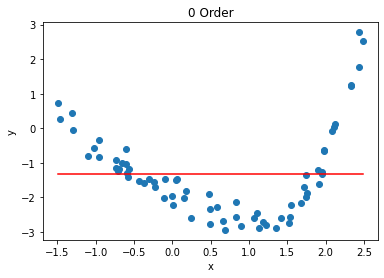

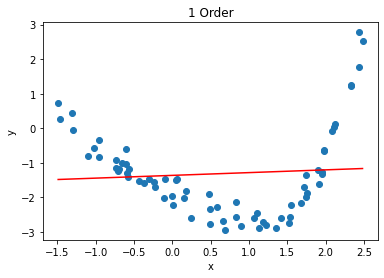

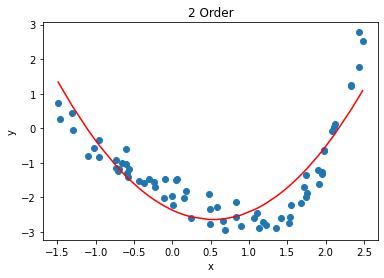

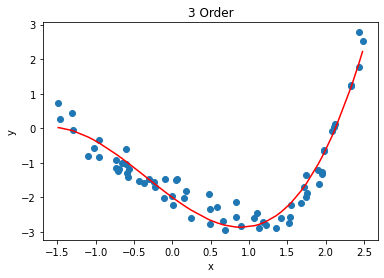

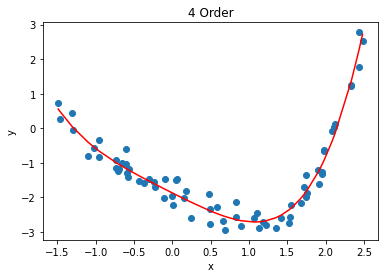

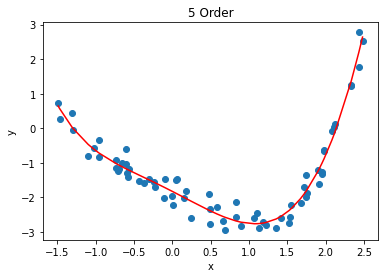

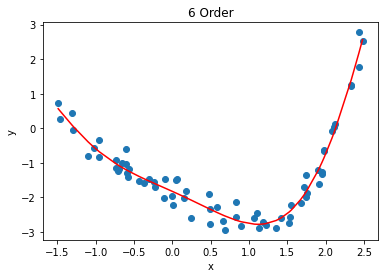

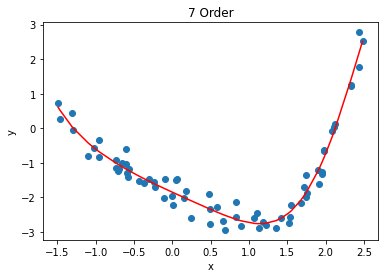

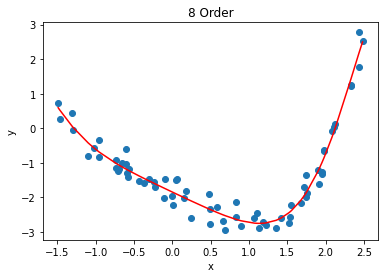

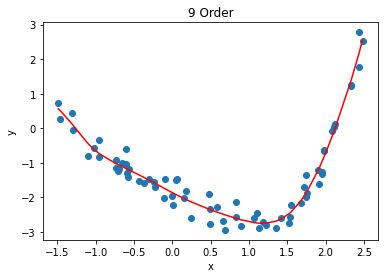

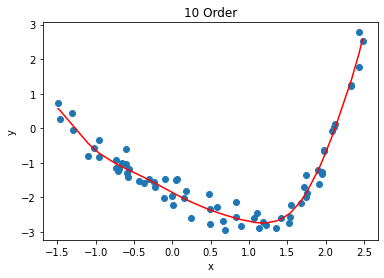

In [30]:
# Plot the polynomial regressions
max_order=10;
Y_hat=[];Errors=[];
for ii in range(max_order+1):
    y_hat,error,_,_=poly_reg(Data['x'],Data['y'],ii,1) 
    Y_hat.append(y_hat)
    Errors.append(error)


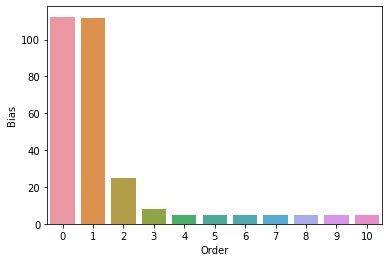

In [31]:
#%% Plot errors (Bias)
Errors=pd.DataFrame({'Bias':Errors,'Order':np.arange(0,11,step=1)});
sn.barplot(x='Order',y='Bias',data=Errors)

In [36]:
#%% Plot cross varidation score to estimate the variance 
# Finally, we can pick the order considering Bias-Variance Trade-off!!
num_fold=10
Data_dic={'x': Data['x'].reshape(-1),'y': Data['y'].reshape(-1)}
Data_pd=pd.DataFrame(Data_dic)
Pred_error_all=[]
for ii in range(max_order+1):
    pred_error=0
    for ff in range(num_fold):
        ind=np.arange(int(len(Data_pd)/num_fold)*ff,int(len(Data_pd)/num_fold)*(ff+1))
        Train_x=Data_pd['x'].drop(ind).values
        Train_y=Data_pd['y'].drop(ind).values
        Test=Data_pd.iloc[ind]
        y_hat,squared_error,y_new_hat,pred_error=poly_reg(Train_x,Train_y,ii,0,Test['x'].values,Test['y'].values)
        pred_error+=pred_error
    Pred_error_all.append(pred_error)
Errors['Variance']=Pred_error_all
print(Errors)
# It is better to melt down to visualize bias and variance at the same time. 
Errors_reshaped=pd.melt(Errors, id_vars='Order', var_name=['Error type'], value_name='Errors')
print(Errors_reshaped)

          Bias  Order     Variance
0   112.456441      0   139.617752
1   111.852146      1   219.132927
2    24.659442      2    66.567635
3     8.251140      3    16.641866
4     4.972459      4     4.971076
5     4.870728      5    10.237490
6     4.780353      6    17.642750
7     4.748786      7    33.162583
8     4.744904      8    21.020673
9     4.700163      9   321.248241
10    4.695935     10  1255.403249
    Order Error type       Errors
0       0       Bias   112.456441
1       1       Bias   111.852146
2       2       Bias    24.659442
3       3       Bias     8.251140
4       4       Bias     4.972459
5       5       Bias     4.870728
6       6       Bias     4.780353
7       7       Bias     4.748786
8       8       Bias     4.744904
9       9       Bias     4.700163
10     10       Bias     4.695935
11      0   Variance   139.617752
12      1   Variance   219.132927
13      2   Variance    66.567635
14      3   Variance    16.641866
15      4   Variance     4.971076
16

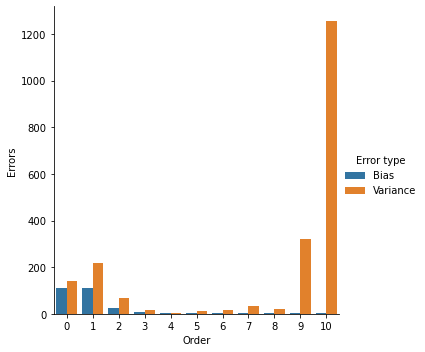

In [35]:
sn.factorplot(x='Order', y='Errors', hue='Error type', data=Errors_reshaped, kind='bar')
# Polynomial order 4 has the lowest bias and variance!!

# Constrained Least Squares Optimization
Load the file constrainedLS.mat into MATLAB or Jupyter notebook. This contains an N $\times$ 2 data matrix, data, whose columns correspond to horizontal and vertical coordinates of a set of 2D data points, ~$\overrightarrow{d_n}$. It also contains
a 2-vector $\overrightarrow{w}$. Consider a constrained optimization problem:
\begin{equation}
    \begin{array}{lcl}
    \min\limits_{\overrightarrow{\beta}} \sum\limits_{n}(\overrightarrow{\beta}^T\overrightarrow{d_n})^2 
    \end{array}
\end{equation}
s.t.            $\overrightarrow{\beta}^T\overrightarrow{w}=1$



(a) Rewrite the optimization problem in matrix form. Then rewrite the problem in terms of
a new optimization variable, ~ $\tilde{\beta}$(i.e. 'beta tilde', a linear transformation of $\overrightarrow{\beta}$), such that the quantity to be minimized is now $||\tilde{\beta}||^2$. Note: you must also rewrite the constraint in terms of $\tilde{\beta}$.

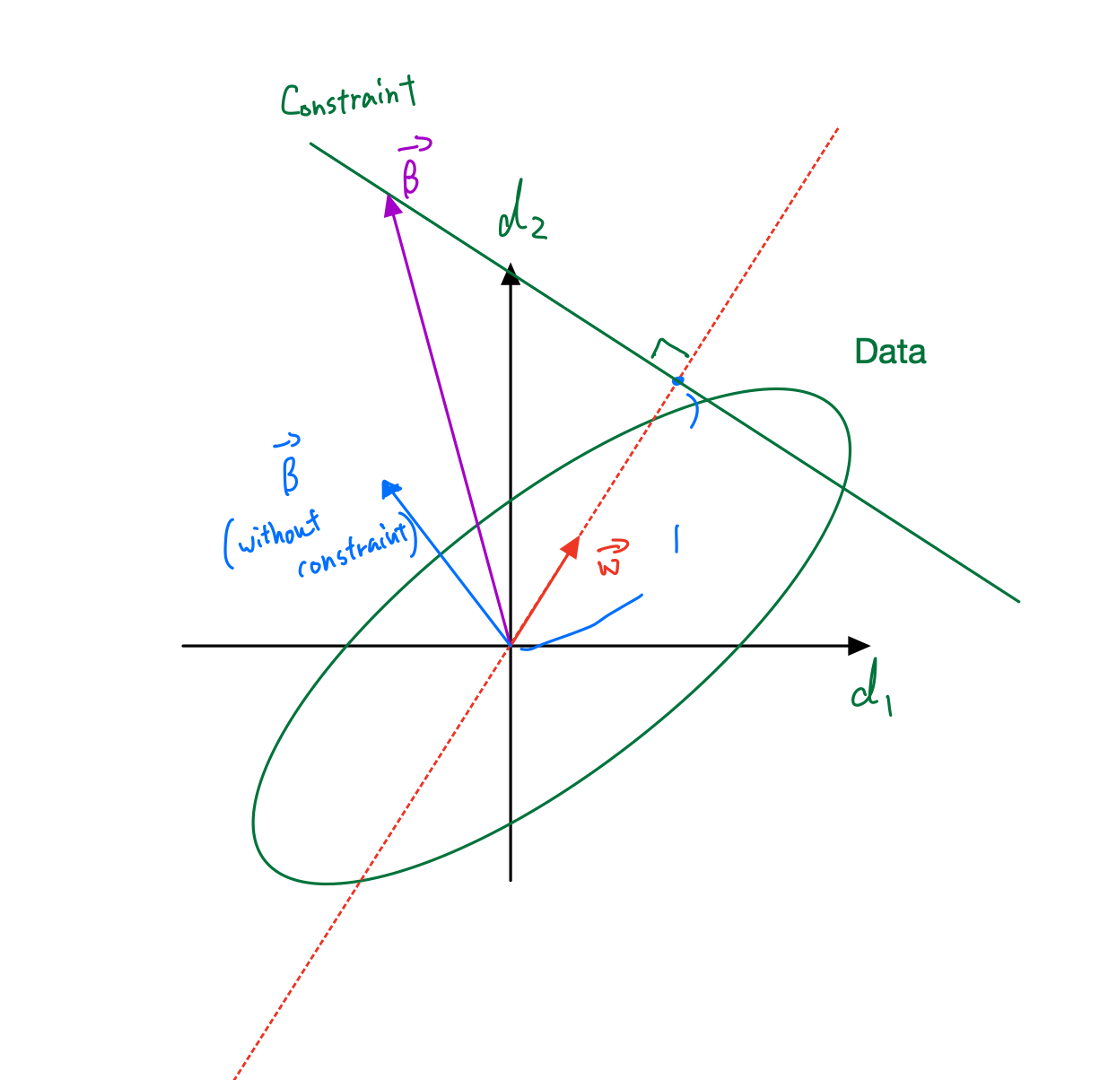

In [41]:
PATH = "/Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Python/DataScience/Final_project/Fig/"
Image(filename = PATH + "Fig2.png", width=500, height=500)